<a href="https://colab.research.google.com/github/aditis1204/ML_Classifiers/blob/master/ML_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [0]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)

In [0]:
attrition_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,56,0,Travel_Rarely,1255,Research & Development,1,2,Life Sciences,1,1441,1,Female,90,3,1,Research Scientist,1,Married,2066,10494,2,No,22,4,4,1,5,3,4,3,2,1,0,1023
1024,47,0,Travel_Rarely,359,Research & Development,2,4,Medical,1,1443,1,Female,82,3,4,Research Director,3,Married,17169,26703,3,No,19,3,2,2,26,2,4,20,17,5,6,1024
1025,24,0,Travel_Rarely,1476,Sales,4,1,Medical,1,1445,4,Female,42,3,2,Sales Executive,3,Married,4162,15211,1,Yes,12,3,3,2,5,3,3,5,4,0,3,1025
1026,32,0,Travel_Rarely,601,Sales,7,5,Marketing,1,1446,4,Male,97,3,2,Sales Executive,4,Married,9204,23343,4,No,12,3,3,1,7,3,2,4,3,0,3,1026


In [0]:
attrition_data.dtypes


Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance     

In [0]:
# Removing unnecessary columns in the dataset
import warnings
warnings.filterwarnings("ignore")
attrition_data.drop(["ID","EmployeeNumber","EmployeeCount"],axis=1,inplace=True)

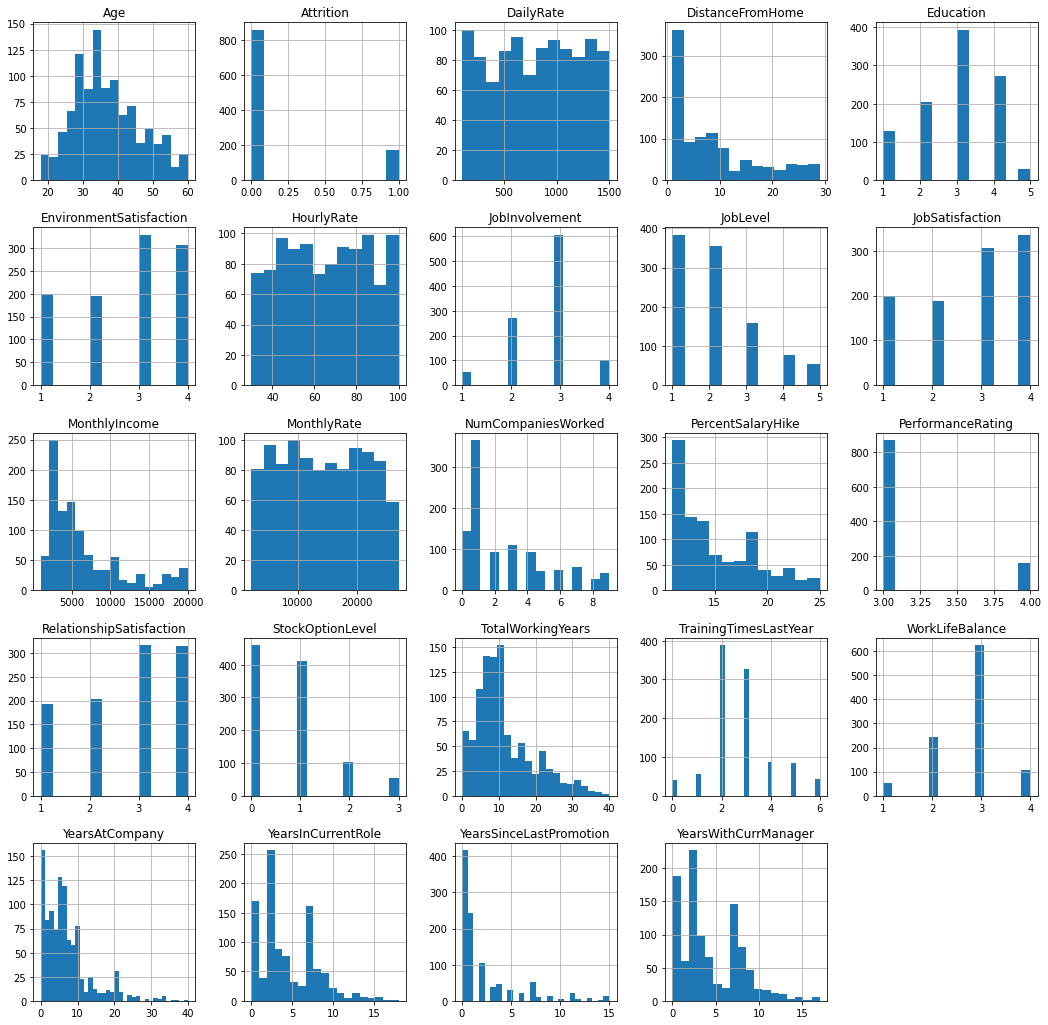

In [0]:
attrition_data.hist(figsize=(18,18),grid=True,bins='auto');


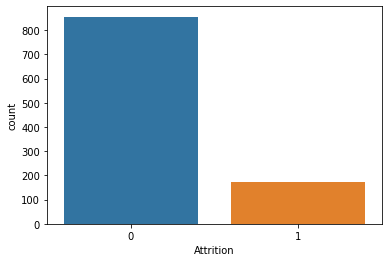

In [0]:
sns.countplot(attrition_data["Attrition"])


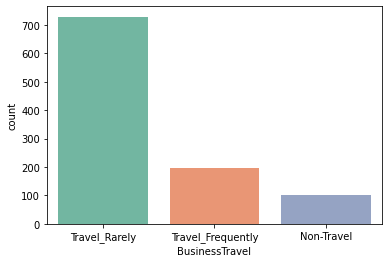

In [0]:
sns.countplot(attrition_data["BusinessTravel"],palette="Set2")


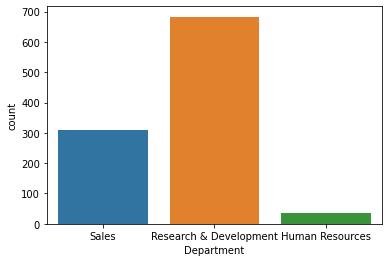

In [0]:
sns.countplot(attrition_data["Department"])


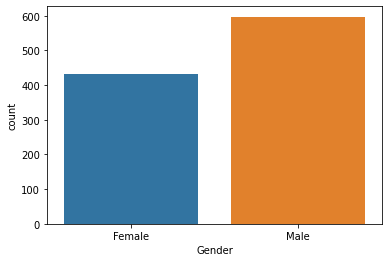

In [0]:
sns.countplot(attrition_data["Gender"])


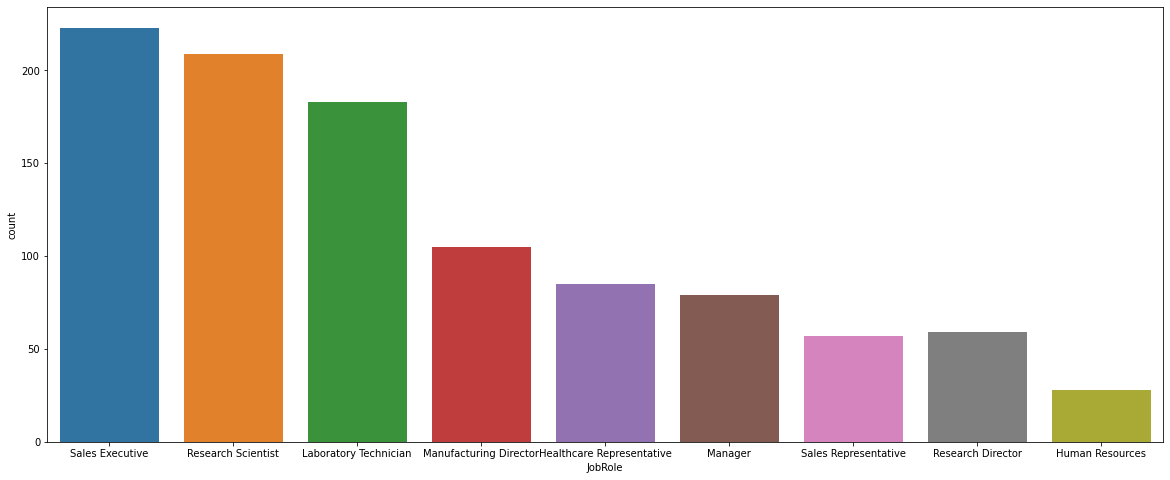

In [0]:
plt.figure(figsize=(20,8))
sns.countplot(attrition_data["JobRole"])

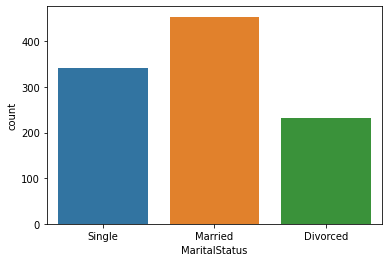

In [0]:
sns.countplot(attrition_data["MaritalStatus"])


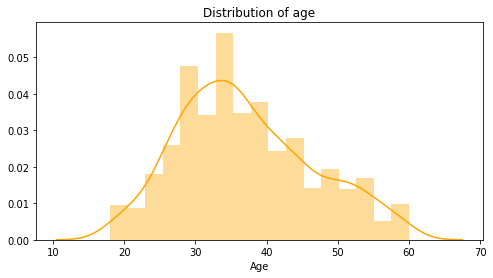

In [0]:
plt.figure(figsize=(8,4))
plt.title("Distribution of age")
a = sns.distplot(attrition_data["Age"], color = 'orange')

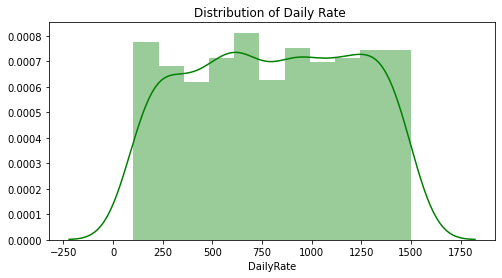

In [0]:
plt.figure(figsize=(8,4))
plt.title("Distribution of Daily Rate ")
b= sns.distplot(attrition_data["DailyRate"], color = 'green')

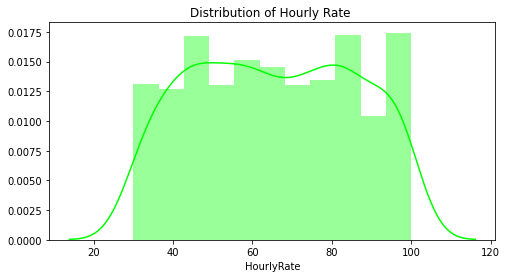

In [0]:
plt.figure(figsize=(8,4))
plt.title("Distribution of Hourly Rate ")
c= sns.distplot(attrition_data["HourlyRate"], color = 'lime')

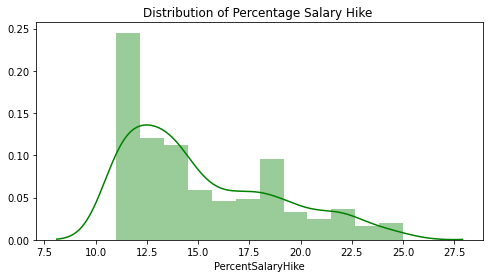

In [0]:
plt.figure(figsize=(8,4))
plt.title("Distribution of Percentage Salary Hike ")
d= sns.distplot(attrition_data["PercentSalaryHike"], color = 'green')

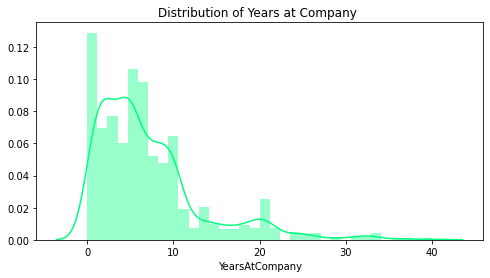

In [0]:
plt.figure(figsize=(8,4))
plt.title("Distribution of Years at Company ")
e= sns.distplot(attrition_data["YearsAtCompany"], color = 'springgreen')

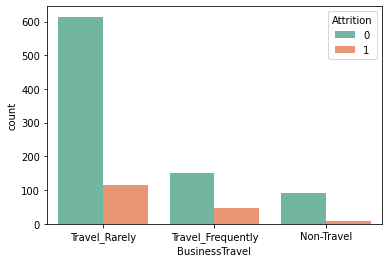

In [0]:
sns.countplot(x="BusinessTravel", hue="Attrition",data=attrition_data,palette="Set2")
plt.show()

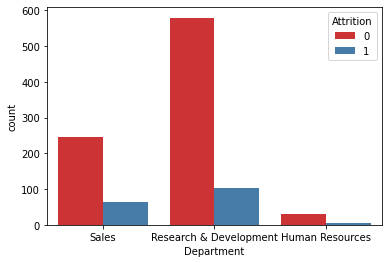

In [0]:
sns.countplot(x="Department", hue="Attrition",data=attrition_data,palette="Set1")
plt.show()

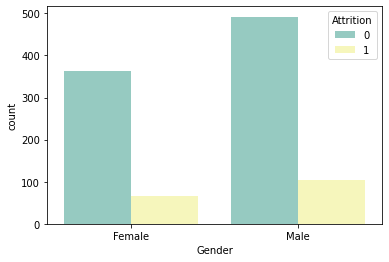

In [0]:
sns.countplot(x="Gender", hue="Attrition",data=attrition_data,palette="Set3")
plt.show()

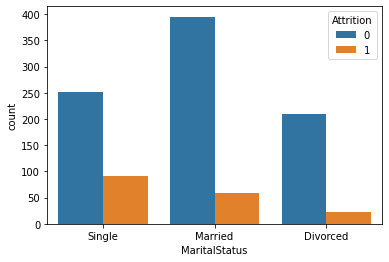

In [0]:
sns.countplot(x="MaritalStatus", hue="Attrition",data=attrition_data)
plt.show()

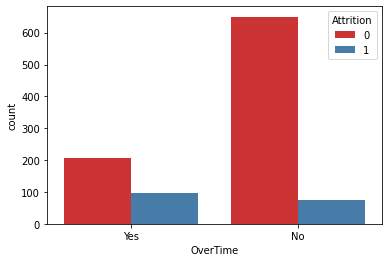

In [0]:
sns.countplot(x="OverTime", hue="Attrition",data=attrition_data,palette="Set1")
plt.show()

In [0]:
attrition_data.corr()


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.168641,0.010270,-0.022883,0.181464,0.033375,0.006313,0.042037,0.512325,-0.021383,0.503340,0.016969,0.313343,-0.025688,-0.037771,0.061905,0.006998,0.691968,-0.002472,-0.028193,0.317744,0.209906,0.215766,0.194178
Attrition,-0.168641,1.000000,-0.050566,0.086875,-0.041021,-0.119202,-0.018472,-0.158768,-0.169121,-0.097518,-0.163709,0.025739,0.037174,0.008138,0.005300,-0.050263,-0.160597,-0.178842,-0.038728,-0.064322,-0.133021,-0.159691,-0.031826,-0.151208
DailyRate,0.010270,-0.050566,1.000000,0.023364,-0.049667,0.018301,0.025172,0.057859,0.009149,0.032010,0.015948,-0.042087,0.026531,0.031686,0.024503,-0.023635,0.042857,0.028833,0.004617,-0.066313,-0.042520,0.005374,-0.041213,-0.037282
DistanceFromHome,-0.022883,0.086875,0.023364,1.000000,0.012416,-0.022668,0.056265,0.058609,-0.030509,0.002253,-0.048151,0.026314,-0.021968,0.041837,0.034268,0.005861,0.043912,-0.025257,-0.007631,-0.053905,-0.029847,-0.004379,-0.008735,-0.004795
Education,0.181464,-0.041021,-0.049667,0.012416,1.000000,0.006558,0.022398,0.028283,0.098366,0.003848,0.098867,-0.049857,0.133409,-0.018768,-0.039675,0.014048,-0.003790,0.133525,-0.036168,0.011091,0.061348,0.075898,0.072333,0.086565
EnvironmentSatisfaction,0.033375,-0.119202,0.018301,-0.022668,0.006558,1.000000,-0.066821,0.014838,0.014005,0.017982,-0.000771,0.019339,0.000308,-0.063798,-0.044733,-0.011526,0.020861,0.008940,-0.036634,0.018968,0.000121,0.025088,0.023509,-0.003313
HourlyRate,0.006313,-0.018472,0.025172,0.056265,0.022398,-0.066821,1.000000,0.045250,-0.013305,-0.072199,-0.004524,-0.026535,0.023740,-0.007174,-0.009990,-0.016492,0.020385,-0.010346,-0.014123,0.002916,-0.018412,-0.033051,-0.042768,-0.030232
JobInvolvement,0.042037,-0.158768,0.057859,0.058609,0.028283,0.014838,0.045250,1.000000,-0.007549,-0.037395,-0.006137,-0.011343,0.010136,-0.022957,-0.014805,0.061255,0.043739,-0.005842,-0.030435,-0.022140,-0.009283,0.011350,-0.021055,0.038344
JobLevel,0.512325,-0.169121,0.009149,-0.030509,0.098366,0.014005,-0.013305,-0.007549,1.000000,-0.026036,0.954374,0.021875,0.145089,-0.069790,-0.060803,0.031862,0.013419,0.789603,-0.007115,0.038443,0.546291,0.406993,0.358058,0.376563
JobSatisfaction,-0.021383,-0.097518,0.032010,0.002253,0.003848,0.017982,-0.072199,-0.037395,-0.026036,1.000000,-0.026646,0.027266,-0.065640,-0.002446,-0.029304,-0.004539,0.025209,-0.040235,0.014605,-0.066238,-0.030551,-0.020956,-0.034739,-0.046355


In [0]:
attrition_data.skew(axis=0)


Age                         0.411310
Attrition                   1.785210
DailyRate                  -0.035683
DistanceFromHome            0.996036
Education                  -0.271212
EnvironmentSatisfaction    -0.332279
HourlyRate                  0.009981
JobInvolvement             -0.462914
JobLevel                    0.988215
JobSatisfaction            -0.368949
MonthlyIncome               1.306446
MonthlyRate                 0.016604
NumCompaniesWorked          1.021353
PercentSalaryHike           0.806683
PerformanceRating           1.933632
RelationshipSatisfaction   -0.329793
StockOptionLevel            1.018030
TotalWorkingYears           1.079786
TrainingTimesLastYear       0.536270
WorkLifeBalance            -0.543323
YearsAtCompany              1.772493
YearsInCurrentRole          0.914235
YearsSinceLastPromotion     1.979317
YearsWithCurrManager        0.834908
dtype: float64

In [0]:
# Treating the skewness in the dataset
for index in attrition_data.skew().index:
    if attrition_data.skew().loc[index]>0.5:
        attrition_data[index]=np.log1p(attrition_data[index])

In [0]:
attrition_data.skew(axis=0)


Age                         0.411310
Attrition                   1.785210
DailyRate                  -0.035683
DistanceFromHome            0.013308
Education                  -0.271212
EnvironmentSatisfaction    -0.332279
HourlyRate                  0.009981
JobInvolvement             -0.462914
JobLevel                    0.437128
JobSatisfaction            -0.368949
MonthlyIncome               0.283931
MonthlyRate                 0.016604
NumCompaniesWorked          0.097949
PercentSalaryHike           0.506312
PerformanceRating           1.933632
RelationshipSatisfaction   -0.329793
StockOptionLevel            0.319887
TotalWorkingYears          -0.600967
TrainingTimesLastYear      -1.064700
WorkLifeBalance            -0.543323
YearsAtCompany             -0.185868
YearsInCurrentRole         -0.401902
YearsSinceLastPromotion     0.731508
YearsWithCurrManager       -0.349326
dtype: float64

In [0]:

# separate the labels and the features - method 1 
label = attrition_data['Attrition']
features_df = attrition_data.drop(['Attrition'], axis=1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(features_df, label, train_size=0.8, random_state=123)


In [0]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
#Visualizing overfitting

In [0]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()

attrition_data["Attrition"]=LE.fit_transform(attrition_data["Attrition"])
attrition_data["BusinessTravel"]=LE.fit_transform(attrition_data["BusinessTravel"])
attrition_data["Department"]=LE.fit_transform(attrition_data["Department"])
attrition_data["EducationField"]=LE.fit_transform(attrition_data["EducationField"])
attrition_data["Gender"]=LE.fit_transform(attrition_data["Gender"])
attrition_data["JobRole"]=LE.fit_transform(attrition_data["JobRole"])
attrition_data["MaritalStatus"]=LE.fit_transform(attrition_data["MaritalStatus"])
attrition_data["OverTime"]=LE.fit_transform(attrition_data["OverTime"])

In [0]:
from scipy.stats import zscore
z_score=abs(zscore(attrition_data))
print("The shape of dataset before removing outliers",attrition_data.shape)
attrition_data=attrition_data.loc[(z_score<3).all(axis=1)]
print("The shape of dataset after removing outliers",attrition_data.shape)

The shape of dataset before removing outliers (1028, 31)
The shape of dataset after removing outliers (979, 31)


In [0]:
X= attrition_data.drop(["Attrition"],axis=1)
y= attrition_data["Attrition"]

In [0]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X= scaler.fit_transform(X)

In [0]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.20)

In [0]:

def max_auc_roc_sc(w,X,y):
    max_auc_roc_sc=0
    for r_state in range(42,100):
        X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.30, random_state=r_state,stratify=y)
        w.fit(X_train,y_train)
        y_pred= w.predict(X_test)
        auc_roc=roc_auc_score(y_test,y_pred)
        if auc_roc>max_auc_roc_sc:
            max_auc_roc_sc=auc_roc
            a_score=r_state
    print("Maximum AUC_ROC Score corresponding to:",a_score," and it is :",round((max_auc_roc_sc),3))

In [0]:
knn= KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
knn= GridSearchCV(knn, neighbors, cv=5,scoring="roc_auc")
knn.fit(X,y)
knn.best_params_

{'n_neighbors': 19}

In [0]:
knn=KNeighborsClassifier(n_neighbors=29)
max_auc_roc_sc(knn,X,y)

Maximum AUC_ROC Score corresponding to: 55  and it is : 0.543


In [0]:
pred_knn= knn.predict(X_test)
m1= knn.score(X_test, y_test)
print("The accuracy of the KNN Model is:",round((m1),3))
print(confusion_matrix(y_test,pred_knn))

The accuracy of the KNN Model is: 0.821
[[160   0]
 [ 35   1]]


### Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
parameters= {'n_estimators':[4,6,8],'max_features':['log2','sqrt','auto'],'criterion':['entropy','gini'],'max_depth':[2,5,10],'min_samples_split':[2,3,5],'min_samples_leaf':[3,5,7]}
rfc= GridSearchCV(rfc,parameters)
rfc.fit(X,y)
rfc.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 3,
 'n_estimators': 4}

In [0]:
rfc=RandomForestClassifier(criterion='gini', max_depth=10,max_features='sqrt',min_samples_leaf=5,min_samples_split=3,n_estimators=8)
max_auc_roc_sc(rfc,X,y)


Maximum AUC_ROC Score corresponding to: 88  and it is : 0.613


In [0]:
pred_rfc= rfc.predict(X_test)
rf= rfc.score(X_test, y_test)
print("The accuracy of the Random Forest Classifier is:",round((rf),3))

The accuracy of the Random Forest Classifier is: 0.878


In [0]:
print(confusion_matrix(y_test,pred_rfc))

[[160   0]
 [ 24  12]]


In [0]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       160
           1       1.00      0.33      0.50        36

    accuracy                           0.88       196
   macro avg       0.93      0.67      0.72       196
weighted avg       0.89      0.88      0.85       196



In [0]:
from sklearn.model_selection import cross_val_score
mean_rfc_auc=cross_val_score(rfc, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(rfc, X,y,cv=5,scoring="roc_auc").mean())
std_rfc_auc= cross_val_score(rfc, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for Random Forest Classifier from mean AUC_ROC score is",cross_val_score(rfc, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.7501532250613929
standard deviation for Random Forest Classifier from mean AUC_ROC score is 0.04639541778806752


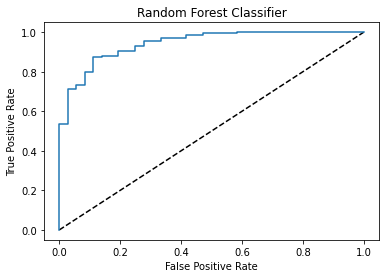

In [0]:
y_pred_prob= rfc.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)

# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest Classifier")
plt.show()

### DecisionTree Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy',max_depth=50)


In [0]:
max_auc_roc_sc(dtc,X,y)

Maximum AUC_ROC Score corresponding to: 69  and it is : 0.667


In [0]:
pred_dtc= dtc.predict(X_test)
dtc1= dtc.score(X_test, y_test)
print("The accuracy of the Decision Tree Model is:",round((dtc1),3))
print(confusion_matrix(y_test,pred_dtc))

The accuracy of the Decision Tree Model is: 0.959
[[157   3]
 [  5  31]]


In [0]:
print(classification_report(y_test,pred_dtc))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       160
           1       0.91      0.86      0.89        36

    accuracy                           0.96       196
   macro avg       0.94      0.92      0.93       196
weighted avg       0.96      0.96      0.96       196



In [0]:
from sklearn.model_selection import cross_val_score
mean_dtc_auc=cross_val_score(dtc, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score Score after cross validation", cross_val_score(dtc, X,y,cv=5,scoring="roc_auc").mean())
s_dtc_auc= cross_val_score(dtc, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for Decision Tree Classifier from mean AUC_ROC score is",cross_val_score(dtc, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score Score after cross validation 0.6059417840879289
standard deviation for Decision Tree Classifier from mean AUC_ROC score is 0.023406224265176395


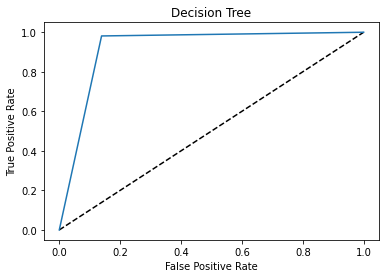

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob= dtc.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree")
plt.show()

### XGB Classifier

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
parameters= {'learning_rate': [0.01,0.03,0.05], 'subsample': [0.1, 0.5,0.3], 'n_estimators': [10,50,100], 'max_depth': [2,4,8]}
gb= GridSearchCV(estimator=gb, param_grid= parameters, cv=5, n_jobs=-1)
gb.fit(X,y)
gb.best_params_

{'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.3}

In [0]:
gb = GradientBoostingClassifier(learning_rate=0.05,max_depth=2,n_estimators=100,subsample=0.1)
max_auc_roc_sc(gb,X,y)

Maximum AUC_ROC Score corresponding to: 79  and it is : 0.679


In [0]:
pred_gb= gb.predict(X_test)
gb1= gb.score(X_test, y_test)
print("The accuracy of the Grading Boosting Model is:",round((gb1),3))

The accuracy of the Grading Boosting Model is: 0.857


In [0]:
print(confusion_matrix(y_test,pred_gb))

[[155   5]
 [ 23  13]]


In [0]:
print(classification_report(y_test,pred_gb))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       160
           1       0.72      0.36      0.48        36

    accuracy                           0.86       196
   macro avg       0.80      0.66      0.70       196
weighted avg       0.84      0.86      0.84       196



In [0]:
from sklearn.model_selection import cross_val_score
mean_gb_auc=cross_val_score(gb, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(gb, X,y,cv=5,scoring="roc_auc").mean())
std_gb_auc= cross_val_score(gb, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for Gradient  Boosting from mean AUC_ROC score is",cross_val_score(gb, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.7549575987053859
standard deviation for Gradient  Boosting from mean AUC_ROC score is 0.048276776403284385


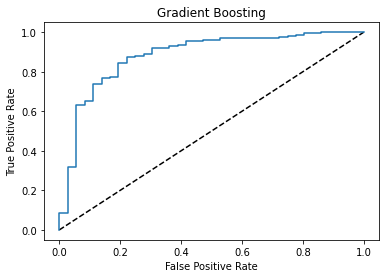

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob= gb.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Gradient Boosting")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boosting")
plt.show()